<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/tesi/tesi_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/colab


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab


## Data preparation

In [301]:
dfa = pd.read_excel('results adults2.xlsx')

In [302]:
column_types = dfa.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

Column types and counts:
object     89
float64    20
int64       1
Name: count, dtype: int64


In [303]:
dfa = dfa.dropna(axis=1, how='all')
dfa.shape

(786, 109)

In [304]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Columns: 109 entries, ID risposta to Il PADRE ha avuto difficoltà di rendimento/apprendimento che lo hanno spinto a cambiare tipologia di indirizzo di scuola secondaria di secondo grado (o superiore)?
dtypes: float64(19), int64(1), object(89)
memory usage: 669.5+ KB


renaming columns to have more managable titles:

In [305]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfa.columns}
dfa.columns = [column_mapping[col] for col in dfa.columns]
column_mapping



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ID risposta': 'id_risposta',
 'Ha uno o più figli adottati nati prima del 2002 (escluso)?': 'figli_adottati_nati_prima_2002_escluso',
 'Numero di figli adottati nati prima del 2002 (escluso) [N°][]': 'numero_figli_adottati_nati_prima_2002_escluso_n',
 'Genere': 'genere',
 'Anno di nascita [Anno di nascita][]': 'anno_nascita_anno_nascita',
 'Adozione': 'adozione',
 'Anno di arrivo in famiglia [Anno][]': 'anno_arrivo_famiglia_anno',
 'Stato di provenienza': 'stato_provenienza',
 'Era scolarizzato nel paese di origine (Italia inclusa)?': 'scolarizzato_paese_origine_italia_inclusa',
 'Età di inserimento a scuola [Età][]': 'età_inserimento_scuola_età',
 'Prima classe di frequenza a scuola': 'prima_classe_frequenza_scuola',
 'Prima classe di frequenza a scuola [Altro]': 'prima_classe_frequenza_scuola_altro',
 'Ha avuto un PDP per BES non certificato (dal 2013)?': 'pdp_bes_certificato_2013',
 'Presenza di patologie certificate ai sensi della L. 104 comma 1 o comma 3 (dal 1992)?': 'presenza_

In [306]:
dfa.head()

,id_risposta,figli_adottati_nati_prima_2002_escluso,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
0,1,Sì,1.0,Femmina,1999.0,Nazionale,2004.0,Italia,No,5.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,programmista,No,No,No,Sì,"Sì, 1 anno",Sì
1,2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Sì,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
3,4,Sì,1.0,Femmina,1996.0,Internazionale,2003.0,Ucraina,No,6.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,Impiegato,Sì,No,No,No,No,No
4,5,Sì,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No


In [307]:
dfa = dfa.dropna(thresh=int(0.10 * dfa.shape[1]), axis=0)
dfa.shape

(495, 109)

In [308]:
dfa = dfa.dropna(subset=['qual_titolo_studio_massimo_conseguito'])


In [309]:
# dfa = dfa.dropna(thresh=int(0.02 * dfa.shape[1]), axis=1)
# dfa.shape

In [310]:
dfa = dfa.loc[:, dfa.apply(pd.Series.nunique) > 1]
dfa.shape

(373, 103)

In [311]:
dfa.head()

,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,Prima elementare,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,Scuola materna,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,No,6.0,Scuola materna,...,60.0,NaN,NaN,Impiegato statale,Sì,No,No,No,No,No
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,No,2.0,Asilo nido,...,NaN,NaN,110.0,docente univers,Sì,No,No,No,No,No
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,Sì,3.0,Scuola materna,...,48.0,NaN,NaN,Impiegato tecnico,Sì,No,No,No,No,No


## Rename column content

In [312]:
dfa.loc[:, 'genere_fem'] = (dfa['genere'] == 'Femmina').astype(int)
dfa.loc[:, 'genere_fem1'] = (dfa['genere1'] == 'Femmina').astype(int)
dfa.loc[:, 'adozione_int'] = (dfa['adozione'] == 'Internazionale').astype(int)
dfa.loc[:, 'adozione_int1'] = (dfa['adozione1'] == 'Internazionale').astype(int)


In [313]:
dfa.loc[:, 'adopt_age'] = dfa['anno_arrivo_famiglia_anno'] - dfa['anno_nascita_anno_nascita']


In [314]:
dfa['attualmente_lavora'].value_counts()

,count
attualmente_lavora,
No,195
Sì,155


In [315]:
for col in dfa.columns:
    if isinstance(dfa[col], pd.Series):
        unique_values = dfa[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfa.loc[:, col] = dfa[col].replace({'Sì': 1, 'No': 0})
dfa.head()

<ipython-input-315-a81d826278f2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfa.loc[:, col] = dfa[col].replace({'Sì': 1, 'No': 0})


,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore,genere_fem,genere_fem1,adozione_int,adozione_int1,adopt_age
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,0.0,6.0,Prima elementare,...,0.0,0.0,0.0,NaN,NaN,1,1,0,0,1.0
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,1.0,4.0,Scuola materna,...,0.0,0.0,1.0,"Sì, 1 anno",0.0,1,0,0,0,5.0
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,0.0,6.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,1,0,1,0,15.0
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,0.0,2.0,Asilo nido,...,0.0,0.0,0.0,No,0.0,0,1,0,0,0.0
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,1.0,3.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,0,1,0,0,3.0


In [316]:
dfa = dfa.drop(columns=['genere','adozione','scuola_secondaria_secondo_grado_superiore_frequentato_altro', 'genere1','adozione1','prima_classe_frequenza_scuola_altro'])

In [317]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfa['prima_classe_frequenza_scuola'] = dfa['prima_classe_frequenza_scuola'].map(hierarchical_mapping)
dfa['prima_classe_frequenza_scuola1'] = dfa['prima_classe_frequenza_scuola1'].map(hierarchical_mapping)


In [318]:
hierarchical_mapping2 = {
    'No': 0,
    'Sì, 1 anno': 1,
    'Sì, 2 anni': 2,
    'Sì, più di 2 anni': 3,
}

dfa['dovuto_ripetere_anni_superiore'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_superiore1'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore1'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_superiore2'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore2'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_superiore3'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore3'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_madre'] = dfa['padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_padre'] = dfa['madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2)
dfa['dovuto_ripetere_anni_corso_formazione'] = dfa['dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'].map(hierarchical_mapping2)

dfa = dfa.drop([
    'dovuto_ripetere_anni_scuola_secondaria_superiore',
    'dovuto_ripetere_anni_scuola_secondaria_superiore1',
    'dovuto_ripetere_anni_scuola_secondaria_superiore2',
    'dovuto_ripetere_anni_scuola_secondaria_superiore3',
    'padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'
], axis=1)

In [319]:
dfa['stato_provenienza'] = dfa['stato_provenienza'].str.lower()

In [320]:
dfa['stato_provenienza1'] = dfa['stato_provenienza1'].str.lower()
dfa['stato_provenienza1'].value_counts()

,count
stato_provenienza1,
russia,12
colombia,9
brasile,8
india,7
italia,6
ucraina,4
cambogia,4
romania,3
nepal,3


In [321]:
region_mapping = {
    # Europe
    'italia': 'Italy',
    'russia': 'East Europe',
    'ucraina': 'East Europe',
    'ungheria': 'East Europe',
    'bulgaria': 'East Europe',
    'bielorussia': 'East Europe',
    'romania': 'East Europe',
    'polonia': 'East Europe',
    'lituania': 'East Europe',
    'moldavia': 'East Europe',
    'ukraina': 'East Europe',
    'karelia': 'East Europe',

    # Latin America
    'brasile': 'Latin America',
    'colombia': 'Latin America',
    'bolivia': 'Latin America',
    'perù': 'Latin America',
    'peru': 'Latin America',
    'peru’': 'Latin America',
    'cile': 'Latin America',
    'ecuador': 'Latin America',
    'messico': 'Latin America',
    'guatemala': 'Latin America',
    'america latina': 'Latin America',

    # Asia
    'india': 'Asia',
    'cambogia': 'Asia',
    'nepal': 'Asia',
    'vietnam': 'Asia',
    'cina': 'Asia',
    'sri lanka': 'Asia',
    'filippine': 'Asia',
    'kazakistan': 'Asia',
    'thailandia': 'Asia',
    'thailand': 'Asia',
    'korea': 'Asia',
    'cambigia': 'Asia',
    'brazile': 'Asia',

    # Africa
    'etiopia': 'Africa',
    'madagascar': 'Africa',
    'marocco': 'Africa',
    'kenya': 'Africa',
    'repubblica democratica del congo': 'Africa',
    'costa d\'avorio': 'Africa',
    'burkina faso': 'Africa',
    'mauritania': 'Africa',

    # Other/Unknown
    'other': 'Other',
}

dfa.loc[:, 'origin_region'] = dfa['stato_provenienza'].str.lower().map(region_mapping)
dfa.loc[:, 'origin_region'] = dfa['origin_region'].fillna('Other')
dfa.loc[:, ['stato_provenienza', 'origin_region']].head()


,stato_provenienza,origin_region
2,italia,Italy
4,italia,Italy
5,ucraina,East Europe
6,italia,Italy
7,italia,Italy


In [322]:
# Define the mapping for regions based on the country names in 'stato_provenienza1'
region_mapping_1 = {
    'italia': 'Italy',
    'russia': 'East Europe',
    'brasile': 'South America',
    'colombia': 'South America',
    'ucraina': 'East Europe',
    'india': 'Asia',
    'cambogia': 'Asia',
    'etiopia': 'Africa',
    'romania': 'East Europe',
    'ungheria': 'East Europe',
    'nepal': 'Asia',
    'bolivia': 'South America',
    'perù': 'South America',
    'kazakistan': 'Asia',
    'bulgaria': 'East Europe',
    'vietnam': 'Asia',
    'polonia': 'East Europe',
    'ghana': 'Africa',
    'moldavia': 'East Europe',
    'filippine': 'Asia',
    'thailandia': 'Asia',
    'messico': 'South America',
    'costa d\'avorio': 'Africa',
    'mauritania': 'Africa',
    'cile': 'South America',
    'nazionale': 'Italy',
    'rissia': 'East Europe',
    'other': 'Other'
}

dfa['origin_region1'] = dfa['stato_provenienza1'].map(region_mapping_1).fillna('No sibling')
dfa['origin_region1'].value_counts()


,count
origin_region1,
No sibling,293
East Europe,26
South America,25
Asia,18
Italy,7
Africa,4


In [323]:
from sklearn.preprocessing import LabelEncoder

frequency_map = dfa['origin_region'].value_counts().to_dict()
dfa['origin_region'] = dfa['origin_region'].map(frequency_map)

frequency_map2 = dfa['origin_region1'].value_counts().to_dict()
dfa['origin_region1'] = dfa['origin_region1'].map(frequency_map2)

In [324]:
experience_mapping = {
    'Meno impegnativo': 1,
    'Impegnativo nello stesso modo': 2,
    'Più impegnativo': 3
}

column_rename_mapping = {
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria': 'school_experience_primary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria1': 'school_experience_primary1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado1': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado1': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università1': 'school_experience_university1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università': 'school_experience_university_encoded'
}

for old_column, new_column in column_rename_mapping.items():
    dfa[new_column] = dfa[old_column].map(experience_mapping)

dfa.drop(columns=column_rename_mapping.keys(), inplace=True)

In [325]:
region_classification = {
    'Lombardia': 'Northern',
    'Emilia Romagna': 'Northern',
    'Veneto': 'Northern',
    'Piemonte': 'Northern',
    'Liguria': 'Northern',
    'Friuli-Venezia Giulia': 'Northern',
    'Valle d\'Aosta': 'Northern',
    'P.A. Trento': 'Northern',
    'P.A. Bolzano': 'Northern',

    'Toscana': 'Central',
    'Lazio': 'Central',
    'Marche': 'Central',
    'Umbria': 'Central',
    'Abruzzo': 'Central',

    'Puglia': 'Southern',
    'Campania': 'Southern',
    'Sicilia': 'Southern',
    'Sardegna': 'Southern',
    'Calabria': 'Southern',
    'Molise': 'Southern',
    'Basilicata': 'Southern'
}

dfa['region_area_madre'] = dfa['regione_residenza_madre'].map(region_classification)
dfa['region_area_padre'] = dfa['regione_residenza_padre'].map(region_classification)

mother_freq_encoding = dfa['region_area_madre'].value_counts(normalize=False)
dfa['region_area_madre_freq_encoded'] = dfa['region_area_madre'].map(mother_freq_encoding)

father_freq_encoding = dfa['region_area_padre'].value_counts(normalize=False)
dfa['region_area_padre_freq_encoded'] = dfa['region_area_padre'].map(father_freq_encoding)

1. Nessun titolo/Licenza elementare o frequentazione della sola scuola primaria
2. Licenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)
3. Titolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)
4. Titolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)
5. Titolo post-secondario non terziario (IFTS)
6. Titolo di studio universitario
7. Titolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)
8. Dottorato di ricerca

In [326]:
dfa['scuola_professionale_corso_formazione_professionale_frequentato'] = dfa['scuola_professionale_corso_formazione_professionale_frequentato'].notna().astype(int)


In [327]:
maps = {
    '1. Liceo': 1,
    '2. Istituto tecnico': 2,
    '3. Istituto professionale': 3,
    'Altro': 4
}

dfa['scuola_secondaria_secondo_grado_superiore_frequentato'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].map(maps).fillna(0)
dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'].map(maps).fillna(0)

In [328]:
dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].value_counts()

,count
scuola_secondaria_secondo_grado_superiore_frequentato,
0.0,147
1.0,108
2.0,52
3.0,48
4.0,18


In [329]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni),226
3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni),50
6.\tTitolo di studio universitario,43
2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore),34
5.\tTitolo post-secondario non terziario (IFTS),10
"7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)",9
1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria,1


In [330]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['qual_titolo_studio_massimo_conseguito', 'qual_titolo_studio_massimo_conseguito1',
            'qual_titolo_studio_massimo_conseguito_madre', 'qual_titolo_studio_massimo_conseguito_padre']:

    dfa[col] = dfa[col].map(mapping)




In [331]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
3.0,226
2.0,50
5.0,43
1.0,34
4.0,10
6.0,9
0.5,1


In [332]:
print(dfa.columns.tolist())


['id_risposta', 'numero_figli_adottati_nati_prima_2002_escluso_n', 'anno_nascita_anno_nascita', 'anno_arrivo_famiglia_anno', 'stato_provenienza', 'scolarizzato_paese_origine_italia_inclusa', 'età_inserimento_scuola_età', 'prima_classe_frequenza_scuola', 'pdp_bes_certificato_2013', 'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992', 'presenza_certificazione_sensi_l170_2010', 'qual_titolo_studio_massimo_conseguito', 'valutazione_voto60', 'valutazione_voto100', 'scuola_secondaria_secondo_grado_superiore_frequentato', 'difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore', 'fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo', 'conseguito_laurea_triennale_magistrale', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'valutazione_laurea_voto110', 'attualmente_lavora', 'lavoro_fa', 'già_indipendenza_economica', 'età_conquistato_indipendenza_economica_anni', 'fatto_esperienze_allestero',

In [333]:
education_mapping = {
    'Scuola secondaria di primo grado': 2,
    'Istituto di formazione professionale che non permette l’accesso all’università 6 Istituto post-secondario non terziario (IFTS)':4,
    'Scuola secondaria di secondo grado che permette l’iscrizione all’università (5 anni)': 3,
    'Titolo post-secondario non terziario (IFTS)': 4,
    'Università': 5,
    'Master, Scuola di perfezionamento, ecc.': 6
}

# dfa['attualmente_frequentando_enc'] = dfa['attualmente_frequentando'].map(education_mapping).fillna(0)
dfa['attualmente_frequentando_enc1'] = dfa['attualmente_frequentando1'].map(education_mapping).fillna(0)
dfa = dfa.drop(columns=['attualmente_frequentando1'])

In [334]:
hierarchical_mapping3 = {
    'Laurea triennale': 5,
    'Laurea magistrale': 6,
}
dfa['conseguito_laurea_triennale_magistrale'] = dfa['conseguito_laurea_triennale_magistrale'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale1'] = dfa['conseguito_laurea_triennale_magistrale1'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale2'] = dfa['conseguito_laurea_triennale_magistrale2'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale3'] = dfa['conseguito_laurea_triennale_magistrale3'].map(hierarchical_mapping3).fillna(0)

In [335]:
dfa['descrizione_nucleo_familiare_figlio'].value_counts()

,count
descrizione_nucleo_familiare_figlio,
Vive con i genitori,266
Vive in coppia con il partner,28
Vive da solo,27
Altro,25
Vive con partner e figli,19
Vive da solo ma ha figli,3


In [336]:
frequency_encoding = dfa['descrizione_nucleo_familiare_figlio'].value_counts()

dfa['descrizione_nucleo_familiare_figlio_encoded'] = dfa['descrizione_nucleo_familiare_figlio'].map(frequency_encoding)
dfa['descrizione_nucleo_familiare_figlio_encoded1'] = dfa['descrizione_nucleo_familiare_figlio1'].map(frequency_encoding)
dfa = dfa.drop(columns=['descrizione_nucleo_familiare_figlio','descrizione_nucleo_familiare_figlio1'])

In [337]:
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].astype(int)

dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].astype(int)

In [338]:
# dfa['left_school_cause_difficult'] = dfa['lasciato'].fillna(0).where(dfa['lasciato'].isna(), 1)
# dfa['left_school_cause_difficult1'] = dfa['lasciato1'].fillna(0).where(dfa['lasciato1'].isna(), 1)
# dfa = dfa.drop(columns=['lasciato', 'lasciato1'])


In [339]:
voto_columns = dfa.columns[dfa.columns.str.contains('voto|anno')].unique()
for col in voto_columns:
    dfa[col] = dfa[col].fillna(0)

In [340]:
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print(duplicate_columns)

['età_inserimento_scuola_età', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'voto_laurea_voto110']


In [341]:
dfa.columns = pd.Series(dfa.columns).apply(lambda x: x + '_1' if x in dfa.columns[dfa.columns.duplicated()].tolist() else x)
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print("Updated Columns (Duplicates should be empty):", duplicate_columns)

Updated Columns (Duplicates should be empty): ['età_inserimento_scuola_età_1', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1', 'voto_laurea_voto110_1']


In [342]:
non_numeric_columns = dfa.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['stato_provenienza', 'scolarizzato_paese_origine_italia_inclusa',
       'pdp_bes_certificato_2013',
       'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
       'presenza_certificazione_sensi_l170_2010',
       'difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore',
       'fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'attualmente_lavora', 'lavoro_fa', 'già_indipendenza_economica',
       'stato_provenienza1', 'scolarizzato_paese_origine_italia_inclusa1',
       'pdp_bes_certificato_20131',
       'presenza_patologie_certificate_sensi_104_comma_1_comma_3_19921',
       'presenza_certificazione_sensi_l170_20101',
       'concluso_percorso_istruzione_formazione1', 'lasciato',
       'lasciato_altro',
       'difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scolastico',
      

In [343]:
dfa = dfa.drop(columns=['stato_provenienza',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa', 'stato_provenienza1', 'lasciato', 'lasciato_altro',
       'tipologia_cambio', 'tipologia_cambio1', 'lasciato1',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa1', 'descrizione_nucleo_familiare_figlio_altro',
       'regione_residenza_madre',
       'professione_madre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'regione_residenza_padre',
       'professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'region_area_madre', 'region_area_padre'
])

In [344]:
dfa = dfa.drop(dfa[dfa['id_risposta'] == 14].index)

In [345]:
dfa['sibling_adopt_yes'] = (dfa['numero_figli_adottati_nati_prima_2002_escluso_n'] > 1).astype(int)

print(dfa[['numero_figli_adottati_nati_prima_2002_escluso_n', 'sibling_adopt_yes']].head())

   numero_figli_adottati_nati_prima_2002_escluso_n  sibling_adopt_yes
2                                              2.0                  1
4                                              1.0                  0
5                                              1.0                  0
6                                              2.0                  1
7                                              2.0                  1


In [346]:
dfa_test = dfa[[
    # "età_inserimento_scuola_età",
    "adopt_age",
    'origin_region',
    "scolarizzato_paese_origine_italia_inclusa",
    "presenza_certificazione_sensi_l170_2010",
    "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore",
    "fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo",
    "già_indipendenza_economica",
    "attualmente_lavora",
    "qual_titolo_studio_massimo_conseguito_madre",
    "qual_titolo_studio_massimo_conseguito_padre",
    "presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992",
    "descrizione_nucleo_familiare_figlio_encoded",
    'sibling_adopt_yes',
    "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scolastico",
    "fatto_esperienze_allestero",
    "genere_fem",
    'school_experience_secondary_encoded',
    'school_experience_primary_encoded',
    'prima_classe_frequenza_scuola',
    'origin_region',
    'dovuto_ripetere_anni_padre',
    'dovuto_ripetere_anni_madre',
    'dovuto_ripetere_anni_superiore',
    'adozione_int',
    "valutazione_voto60",
    "valutazione_voto100",
    'qual_titolo_studio_massimo_conseguito']]

In [347]:
dfa_test.to_excel('dfa.xlsx')

## EDA

array([[<Axes: title={'center': 'adopt_age'}>,
        <Axes: title={'center': 'origin_region'}>,
        <Axes: title={'center': 'qual_titolo_studio_massimo_conseguito_madre'}>,
        <Axes: title={'center': 'qual_titolo_studio_massimo_conseguito_padre'}>],
       [<Axes: title={'center': 'descrizione_nucleo_familiare_figlio_encoded'}>,
        <Axes: title={'center': 'sibling_adopt_yes'}>,
        <Axes: title={'center': 'fatto_esperienze_allestero'}>,
        <Axes: title={'center': 'genere_fem'}>],
       [<Axes: title={'center': 'school_experience_secondary_encoded'}>,
        <Axes: title={'center': 'school_experience_primary_encoded'}>,
        <Axes: title={'center': 'prima_classe_frequenza_scuola'}>,
        <Axes: title={'center': 'origin_region'}>],
       [<Axes: title={'center': 'dovuto_ripetere_anni_padre'}>,
        <Axes: title={'center': 'dovuto_ripetere_anni_madre'}>,
        <Axes: title={'center': 'dovuto_ripetere_anni_superiore'}>,
        <Axes: title={'center':

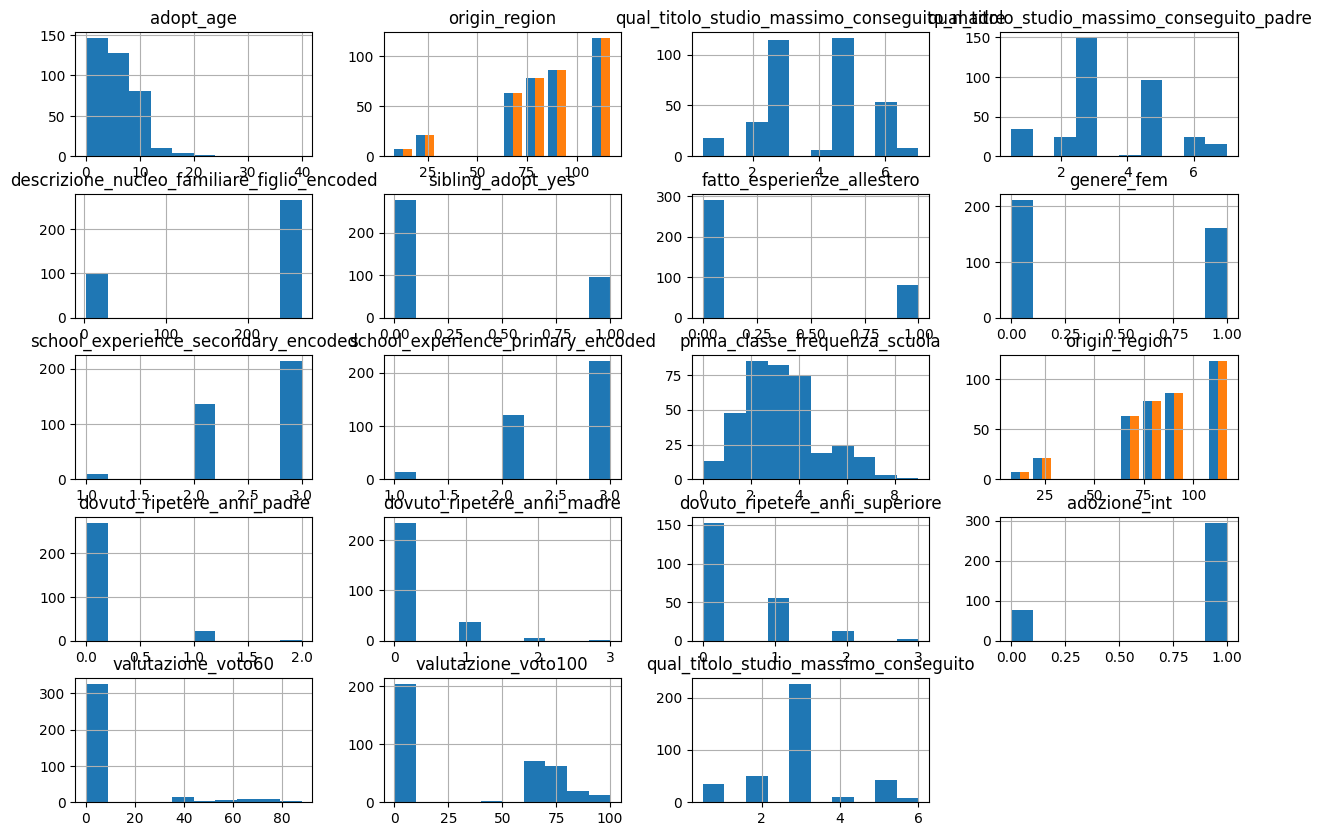

In [348]:
dfa_test.hist(bins = 10, figsize = (15,10))


In [349]:
pd.crosstab(index=dfa_test['qual_titolo_studio_massimo_conseguito'], columns=dfa_test['genere_fem'], margins=True)


genere_fem,0,1,All
qual_titolo_studio_massimo_conseguito,,,
0.5,0,1,1
1.0,22,12,34
2.0,33,17,50
3.0,132,94,226
4.0,6,4,10
5.0,16,27,43
6.0,3,6,9
All,212,161,373


In [350]:
pd.crosstab(index=dfa_test['genere_fem'], columns=[dfa_test['presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'], dfa_test['presenza_certificazione_sensi_l170_2010']], margins=True)


presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992  0.0     1.0  \
presenza_certificazione_sensi_l170_2010                        0.0 1.0 0.0   
genere_fem                                                                   
0                                                              136  29   7   
1                                                              107  13   9   
All                                                            243  42  16   

presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992      All  
presenza_certificazione_sensi_l170_2010                       1.0       
genere_fem                                                              
0                                                               6  178  
1                                                               4  133  
All                                                            10  311

##Children survey results

In [351]:
dfc = pd.read_excel('results kids.xlsx')

In [352]:
dfc.shape

(235, 93)

In [353]:
dfc = dfc.dropna(axis=1, how='all')
dfc.shape

(235, 91)

In [354]:
dfc = dfc.dropna(thresh=int(0.10 * dfc.shape[1]), axis=0)
dfc.shape

(177, 91)

In [355]:
dfc = dfc.loc[:, dfc.apply(pd.Series.nunique) > 1]
dfc.shape

(177, 88)

In [356]:
column_types = dfc.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

Column types and counts:
object            69
float64           14
datetime64[ns]     3
int64              2
Name: count, dtype: int64


In [357]:
stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfc.columns}
dfc.columns = [column_mapping[col] for col in dfc.columns]
column_mapping

{'id. ID risposta': 'id_id_risposta',
 'submitdate. Data invio': 'submitdate_data_invio',
 'lastpage. Ultima pagina': 'lastpage_ultima_pagina',
 'seed. Seme': 'seed_seme',
 'startdate. Data di inizio': 'startdate_data_inizio',
 "datestamp. Data dell'ultima azione": 'datestamp_data_dellultima_azione',
 'refurl. URL di riferimento': 'refurl_url_riferimento',
 "Privacy[SQ001]. In base a quanto previsto dal regolamento Ue n. 679/ 2016 e dal d. Lgs. 30 giugno 2003 n. 196 s.m.i. nonché dall'autorizzazione del garante della privacy n. 5/2002 al trattamento dei dati da parte di diverse categorie di titolari, i dati che la riguardano e che ci vengono liberamente comunicati, registrati su questo questionario online, sono protetti e anonimi. Il questionario, infatti, non chiede dati identificativi, non traccia l’IP, non memorizza i\xa0cookies\xa0dei rispondenti e in nessun modo è possibile risalire al compilatore. Le risposte al questionario saranno trattate in via tutto riservata e in forma aggr

In [358]:
dfc = dfc.iloc[:, 10:]

In [359]:
dfc = dfc.dropna(subset=['g2q00014_concluso_percorso_istruzione_formazione'])


In [360]:
dfc.head()

,g2q00001_genere,g2q00002sq001_sq001_anno_nascita_anno_nascita,g2q00003_adozione,g2q00004sq001_sq001_anno_arrivo_famiglia_anno,g2q00005_stato_provenienza,g2q00006_scolarizzato_paese_origine_italia_inclusa,g2q00009sq001_sq001_età_inserimento_scuola_età,g2q00010_prima_classe_frequenza_scuola,g2q00011_pdp_bes_certificato_2013,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,...,g8q00003sq001_sq001_valutazione_voto60,g8q00003a_conseguito_laurea_triennale_magistrale,g8q00004sq001_sq001_voto_laurea_voto110,g8q00005_professione_padre_quando_fatto_scelta_scuola_secondaria_ii_grado_superiore,g8q00006sq001_padre_mai_stato_organi_collegiali_scuole_propri_figli_no,g8q00006sq002_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,g8q00006sq005_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,g8q00006sq004_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,g8q00007_padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,g8q00008_padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
1,Femmina,1969.0,Nazionale,1969.0,Ita,No,2.0,Asilo nido,No,No,...,NaN,NaN,NaN,Impiegato,Sì,No,No,No,NaN,NaN
2,Maschio,1996.0,Internazionale,2000.0,Ucraina,Sì,6.0,Asilo nido,No,No,...,NaN,NaN,110.0,Docente universitario,Sì,No,No,No,No,No
5,Femmina,1984.0,Internazionale,1986.0,India,No,3.0,Asilo nido,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Maschio,2001.0,Internazionale,2002.0,Brasile,No,2.0,Asilo nido,No,No,...,50.0,NaN,NaN,impiegato,Sì,No,No,No,No,No
9,Maschio,1994.0,Internazionale,2005.0,Brasile,Sì,10.0,Quinta elementare,No,Sì,...,50.0,NaN,NaN,Imprenditore,Sì,No,No,No,No,No


In [361]:
dfc.loc[:, 'genere'] = dfc.loc[:, 'g2q00001_genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfc.loc[:, 'adozione_int'] = dfc.loc[:, 'g2q00003_adozione'].apply(lambda x: 1 if x == 'Internazionale' else 0)
dfc.loc[:, 'adopt_age'] = dfc.loc[:, 'g2q00004sq001_sq001_anno_arrivo_famiglia_anno'] - dfc.loc[:, 'g2q00002sq001_sq001_anno_nascita_anno_nascita']
dfc = dfc.drop(['g2q00001_genere', 'g2q00003_adozione'], axis=1)


In [362]:
for col in dfc.columns:
    if isinstance(dfc[col], pd.Series):
        unique_values = dfc[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfc[col] = dfc[col].replace({'Sì': 1, 'No': 0})
dfc.head()

<ipython-input-362-ec315daae816>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc[col] = dfc[col].replace({'Sì': 1, 'No': 0})


,g2q00002sq001_sq001_anno_nascita_anno_nascita,g2q00004sq001_sq001_anno_arrivo_famiglia_anno,g2q00005_stato_provenienza,g2q00006_scolarizzato_paese_origine_italia_inclusa,g2q00009sq001_sq001_età_inserimento_scuola_età,g2q00010_prima_classe_frequenza_scuola,g2q00011_pdp_bes_certificato_2013,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,g2q00013_presenza_certificazione_sensi_l170_2010,g2q00014_concluso_percorso_istruzione_formazione,...,g8q00005_professione_padre_quando_fatto_scelta_scuola_secondaria_ii_grado_superiore,g8q00006sq001_padre_mai_stato_organi_collegiali_scuole_propri_figli_no,g8q00006sq002_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,g8q00006sq005_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,g8q00006sq004_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,g8q00007_padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,g8q00008_padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore,genere,adozione_int,adopt_age
1,1969.0,1969.0,Ita,0.0,2.0,Asilo nido,0.0,0.0,0.0,1,...,Impiegato,1.0,0.0,0.0,0.0,NaN,NaN,1,0,0.0
2,1996.0,2000.0,Ucraina,1.0,6.0,Asilo nido,0.0,0.0,0.0,1,...,Docente universitario,1.0,0.0,0.0,0.0,No,0.0,0,1,4.0
5,1984.0,1986.0,India,0.0,3.0,Asilo nido,0.0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2.0
6,2001.0,2002.0,Brasile,0.0,2.0,Asilo nido,0.0,0.0,1.0,1,...,impiegato,1.0,0.0,0.0,0.0,No,0.0,0,1,1.0
9,1994.0,2005.0,Brasile,1.0,10.0,Quinta elementare,0.0,1.0,0.0,1,...,Imprenditore,1.0,0.0,0.0,0.0,No,0.0,0,1,11.0


In [363]:
dfc['g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'].isna().sum()


14

In [364]:
experience_mapping = {
    'Per niente': 1,
    'Poco': 2,
    'Abbastanza': 3,
    'Molto': 4
}

for col in ['g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti',
'g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre',
'g2q00030asq003_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_padre',
 'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici',
'g2q00030asq005_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_te_stesso']:
  dfc[col] = dfc[col].map(experience_mapping)

In [365]:
dfc.isna().sum().sort_values(ascending=False)


,0
g2q00028other_lasciato_altro,118
g2q00023other_scuola_secondaria_secondo_grado_superiore_frequentato_altro,118
g2q00017_lasciato,117
g2q00016_iscritto_scuola_secondaria_secondo_grado_superiore,116
g2q00026_tipologia_cambio,115
...,...
genere,0
g2q00002sq001_sq001_anno_nascita_anno_nascita,0
g2q00004sq001_sq001_anno_arrivo_famiglia_anno,0
g2q00014_concluso_percorso_istruzione_formazione,0


In [366]:
dfc = dfc.dropna(thresh=len(dfc) - 100, axis=1)

In [367]:
numeric_columns = dfc.select_dtypes(exclude=['object']).columns
columns_to_replace_99 = [col for col in numeric_columns if 'voto' not in col]
dfc.loc[:, columns_to_replace_99] = dfc[columns_to_replace_99].fillna(99)
columns_to_replace_0 = [col for col in numeric_columns if 'voto' in col]
dfc.loc[:, columns_to_replace_0] = dfc[columns_to_replace_0].fillna(0)

In [368]:
dfc.loc[:,'g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'] = dfc['g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'].fillna(0)

In [369]:
dfc.g2q00015_qual_titolo_studio_massimo_conseguito.value_counts()

,count
g2q00015_qual_titolo_studio_massimo_conseguito,
4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni),43
6.\tTitolo di studio universitario,25
"7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)",15
3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni),15
2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore),4
5.\tTitolo post-secondario non terziario (IFTS),2
8.\tDottorato di ricerca,1


In [370]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfc.loc[:, 'prima_classe_frequenza_scuola'] = dfc['g2q00010_prima_classe_frequenza_scuola'].map(hierarchical_mapping)


In [371]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['g2q00015_qual_titolo_studio_massimo_conseguito','g8q00002_qual_titolo_studio_massimo_conseguito_padre','g7q00002_qual_titolo_studio_massimo_conseguito_madre']:
    dfc.loc[:, col] = dfc.loc[:, col].map(mapping)


In [372]:
ierarchical_mapping = {
    'Peggiori': 0,
    'Uguali': 1,
    'Migliori': 2,
    'Non so': 99 }

dfc.loc[:, 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded'] = dfc['g2q00039_pensi_prospettive_economiche_rispetto_genitori_sonosaranno'].map(hierarchical_mapping)


In [373]:
encoding_mapping = {
    'Impegnativo nello stesso modo': 0,
    'Più impegnativo': 1,
    'Meno impegnativo': 2
}

columns_to_encode = [
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria'
]

for col in columns_to_encode:
    dfc.loc[:, col] = dfc[col].map(encoding_mapping)

column_mapping = {
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università': 'esperienza_uni',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'esperienza_ss',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria': 'esperienza_sp'
}

dfc = dfc.rename(columns=column_mapping)


In [374]:
dfc.to_excel('dfc.xlsx')

In [375]:
dfc = dfc.dropna(subset=['g2q00015_qual_titolo_studio_massimo_conseguito'])
# g2q00011_pdp_bes_certificato_2013	g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992	g2q00013_presenza_certificazione_sensi_l170_2010

In [376]:
dfc.loc[dfc['g2q00036_fatto_esperienze_allestero'] == 'No', 'g2q00036_fatto_esperienze_allestero'] = 0
dfc.loc[(dfc['g2q00036_fatto_esperienze_allestero'] != 'No') & (dfc['g2q00036_fatto_esperienze_allestero'] != 99), 'g2q00036_fatto_esperienze_allestero'] = 1


In [377]:
dfc_test = dfc[[
    'genere',
    'adozione_int',
    "adopt_age",
    'prima_classe_frequenza_scuola',
    'g2q00011_pdp_bes_certificato_2013',
    'g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'g2q00013_presenza_certificazione_sensi_l170_2010',
    "g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni",
    "g2q00036_fatto_esperienze_allestero",
    'prospettive_economiche_rispetto_genitori_sonosaranno_encoded',
    'esperienza_uni',
    'esperienza_ss',
    'esperienza_sp',
    'g2q00022sq001_sq002_valutazione_voto100',
    'g8q00002_qual_titolo_studio_massimo_conseguito_padre',
    'g7q00002_qual_titolo_studio_massimo_conseguito_madre',
    'g2q00015_qual_titolo_studio_massimo_conseguito',
    'g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti',
'g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre',
'g2q00030asq003_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_padre',
 'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici']].fillna(99)

<ipython-input-377-cd5326aa1bf8>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici']].fillna(99)


In [378]:
dfc_test['adopt_age'] = dfc_test['adopt_age'].replace(-1, 0)

In [379]:
dfc_test.head()

,genere,adozione_int,adopt_age,prima_classe_frequenza_scuola,g2q00011_pdp_bes_certificato_2013,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,g2q00013_presenza_certificazione_sensi_l170_2010,g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni,g2q00036_fatto_esperienze_allestero,prospettive_economiche_rispetto_genitori_sonosaranno_encoded,...,esperienza_ss,esperienza_sp,g2q00022sq001_sq002_valutazione_voto100,g8q00002_qual_titolo_studio_massimo_conseguito_padre,g7q00002_qual_titolo_studio_massimo_conseguito_madre,g2q00015_qual_titolo_studio_massimo_conseguito,g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti,g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre,g2q00030asq003_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_padre,g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici
1,1,0,0.0,1.0,0.0,0.0,0.0,27.0,1,99.0,...,0.0,0.0,0.0,1.0,0.5,6.0,1.0,1.0,1.0,1.0
2,0,1,4.0,1.0,0.0,0.0,0.0,99.0,1,99.0,...,0.0,1.0,70.0,7.0,7.0,3.0,3.0,1.0,1.0,1.0
6,0,1,1.0,1.0,0.0,0.0,1.0,99.0,1,99.0,...,1.0,0.0,85.0,3.0,6.0,3.0,1.0,4.0,4.0,1.0
9,0,1,11.0,99.0,0.0,1.0,0.0,26.0,1,99.0,...,0.0,0.0,0.0,3.0,6.0,6.0,2.0,4.0,3.0,4.0
14,1,0,9.0,6.0,0.0,0.0,0.0,24.0,1,99.0,...,0.0,1.0,0.0,99.0,6.0,6.0,4.0,4.0,3.0,3.0


## EDA

In [380]:
dfc_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1 to 234
Data columns (total 21 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   genere                                                                                       105 non-null    int64  
 1   adozione_int                                                                                 105 non-null    int64  
 2   adopt_age                                                                                    105 non-null    float64
 3   prima_classe_frequenza_scuola                                                                105 non-null    float64
 4   g2q00011_pdp_bes_certificato_2013                                                            105 non-null    float64
 5   g2q00012_presenza_patologie_certificate_s

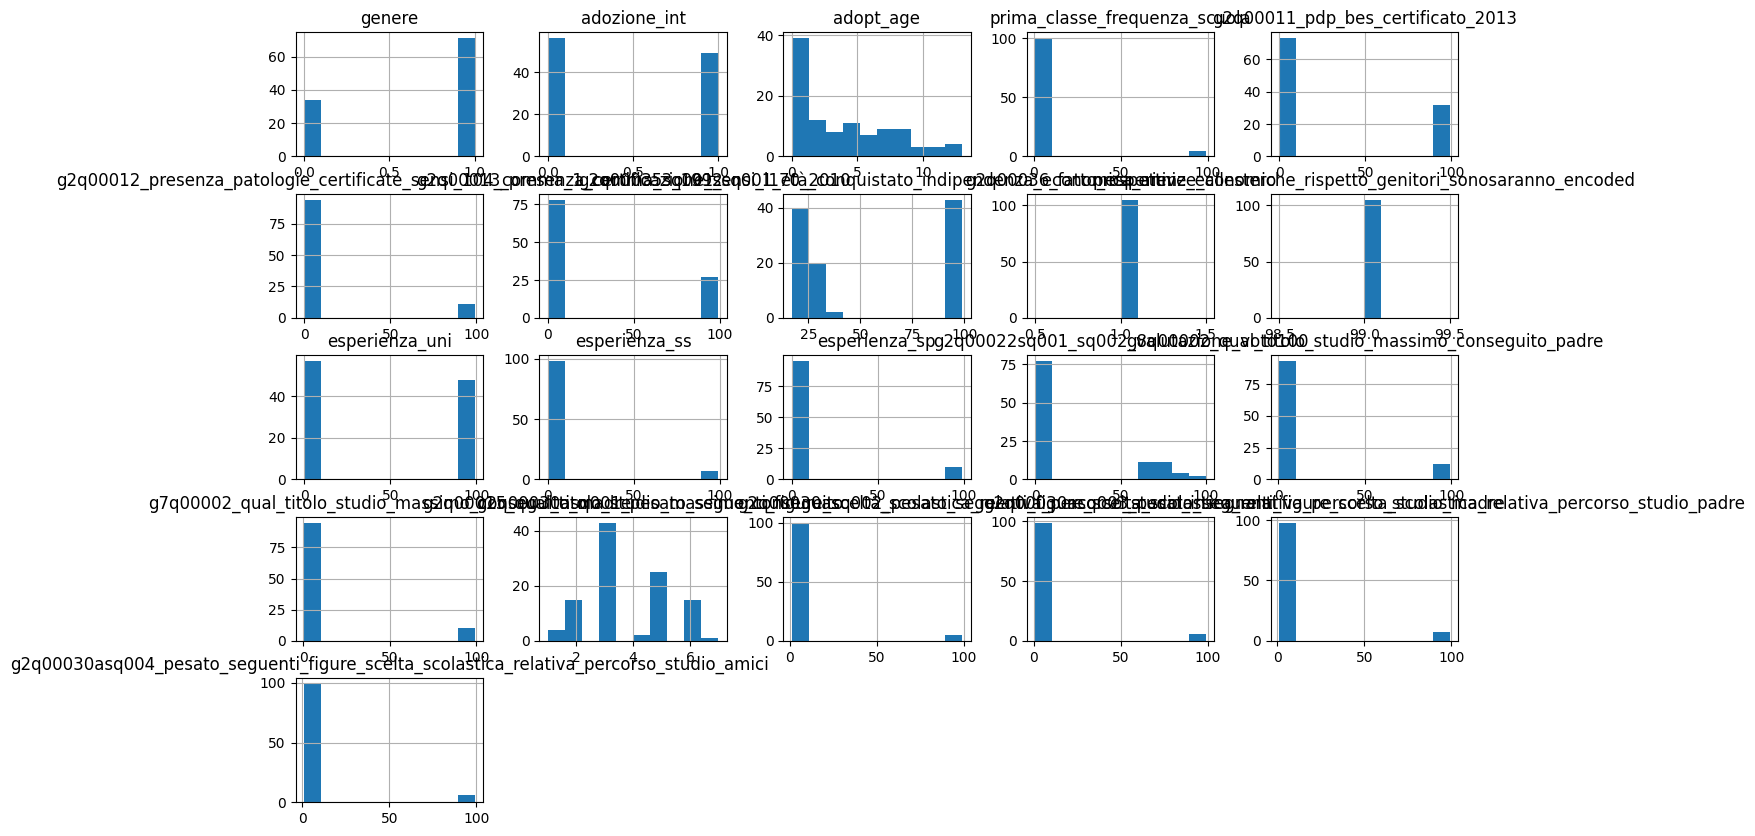

In [381]:
dfc_test.hist(bins = 10, figsize = (15,10))
plt.show()